Link: https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retail = r"C:\Users\nonox\University\City\First semestre\Principles of DS\CourseWork\Data\retail.xlsx"
retail = retail.replace("\\", "/")
retail = pd.read_excel(retail)

In [3]:
print(retail.head())
print(retail.shape)

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
(525461, 8)


In [4]:
print(list(retail.columns))
print("\n")
print(retail.shape)
print("\n")
print(retail.dtypes)
print("\n")
print(retail.dtypes.value_counts())

['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


(525461, 8)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


object            4
float64           2
int64             1
datetime64[ns]    1
dtype: int64


## Negative values

In [5]:
negative_prices = retail[retail['Price'] < 0]
print(negative_prices)

        Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price  Customer ID         Country  
179403 -53594.36          NaN  United Kingdom  
276274 -44031.79          NaN  United Kingdom  
403472 -38925.87          NaN  United Kingdom  


In [6]:
print(retail['Quantity'].sort_values(ascending=True))

303996    -9600
507225    -9360
156488    -9200
428975    -9000
194372    -9000
          ...  
127167    12480
127169    12744
127166    12960
127168    12960
90857     19152
Name: Quantity, Length: 525461, dtype: int64


In [7]:
negative_quantities = retail[retail['Quantity'] < 0]
print(negative_quantities)

        Invoice StockCode                    Description  Quantity  \
178     C489449     22087       PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896             POTTING SHED TWINE        -6   
182     C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                            ...       ...   
525231   538159     21324                            NaN       -18   
525232   538158     20892                            NaN       -32   
525234   538161    46000S                   Dotcom sales      -100   
525235   538162    46000M                   Dotcom sales      -100   
525282  C538164    35004B    SET OF 3 BLACK FLYING DUCKS        -1   

               InvoiceDate  Price  Customer ID         Country  
178    2009-12-01 10:33:00   2.95      16321.0       Australia  
179    2009-12-01 10:33:00   

## Empty cells

In [8]:
print(retail.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [9]:
retail = retail.dropna()
print(retail.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [10]:
print(retail['StockCode'].value_counts().sort_values(ascending=False))

85123A    3245
22423     1872
85099B    1784
21212     1599
21232     1536
          ... 
85024A       1
79157B       1
21852        1
35930        1
22933        1
Name: StockCode, Length: 4031, dtype: int64


In [11]:
print(retail[retail['StockCode']=='85024A'].head(1))
print("\n")
print(retail[retail['StockCode']=='85099B'].head(1))
print("\n")
print(retail[retail['StockCode']=='79157B'].head(1))
print("\n")
print(retail[retail['StockCode']=='21212'].head(1))

      Invoice StockCode                        Description  Quantity  \
11634  490312    85024A  CRYSTAL SMALL JEWELLED PHOTOFRAME         1   

              InvoiceDate  Price  Customer ID         Country  
11634 2009-12-04 15:16:00   1.65      17961.0  United Kingdom  


    Invoice StockCode                  Description  Quantity  \
161  489446    85099B  JUMBO BAG RED WHITE SPOTTY         20   

            InvoiceDate  Price  Customer ID         Country  
161 2009-12-01 10:06:00   1.95      13758.0  United Kingdom  


      Invoice StockCode              Description  Quantity  \
84290  497221    79157B  UBO-LIGHT TRIOBASE BLUE         1   

              InvoiceDate  Price  Customer ID         Country  
84290 2010-02-07 15:07:00   0.85      17550.0  United Kingdom  


Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []


## Country purchase

In [12]:
print(retail['Country'].value_counts())

United Kingdom          379423
EIRE                      8710
Germany                   8129
France                    5710
Netherlands               2769
Spain                     1278
Switzerland               1187
Belgium                   1054
Portugal                  1024
Channel Islands            906
Sweden                     883
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Korea   

## Correlation and some statistics

In [13]:
correlation = retail[['Price', 'Quantity']].corr()
print(correlation)

             Price  Quantity
Price     1.000000 -0.004112
Quantity -0.004112  1.000000


In [14]:
print(retail.describe())

            Quantity          Price    Customer ID
count  417534.000000  417534.000000  417534.000000
mean       12.758815       3.887547   15360.645478
std       101.220424      71.131797    1680.811316
min     -9360.000000       0.000000   12346.000000
25%         2.000000       1.250000   13983.000000
50%         4.000000       1.950000   15311.000000
75%        12.000000       3.750000   16799.000000
max     19152.000000   25111.090000   18287.000000


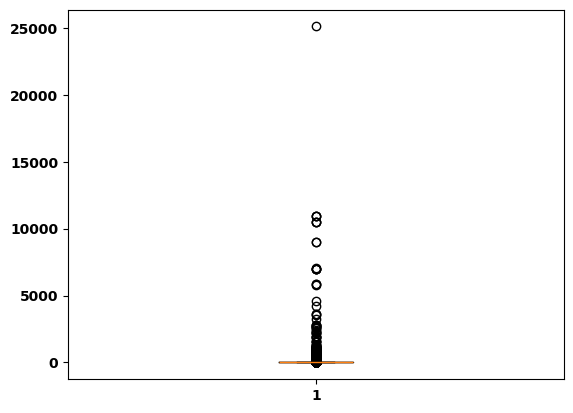

In [15]:
# Checking for outliers in price column
plt.boxplot(retail['Price'])


plt.show()





## Many negative quantities, probably because of returns.

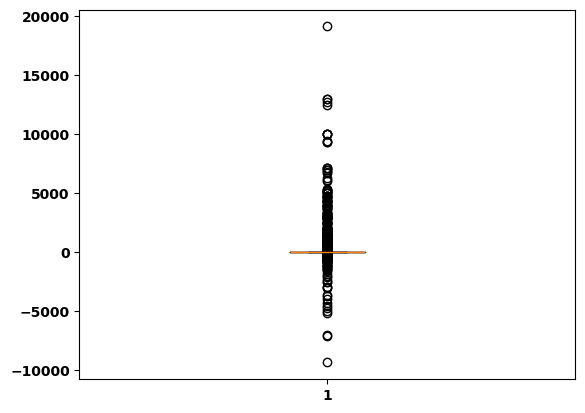

In [16]:
plt.boxplot(retail['Quantity'])

plt.show()


## Deleting outliers


In [17]:
print(retail.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [18]:
# Filtering price
lower_price = retail['Price'].quantile(0.05)
upper_price = retail['Price'].quantile(0.95)


# Filtering quantity
lower_quantity = retail['Quantity'] > 0
upper_quantity = retail['Quantity'].quantile(0.9)

# Update the dataframe
retail = retail[(retail['Quantity'] > 0)
                & (retail['Quantity'] < upper_quantity)
                & (retail['Price'] > lower_price) 
                & (retail['Price'] < upper_price)
               ]

print(retail['Quantity'].min())
print(retail['Quantity'].max())
print(retail['Price'].min())
print(retail['Price'].max())


1
23
0.45
8.49


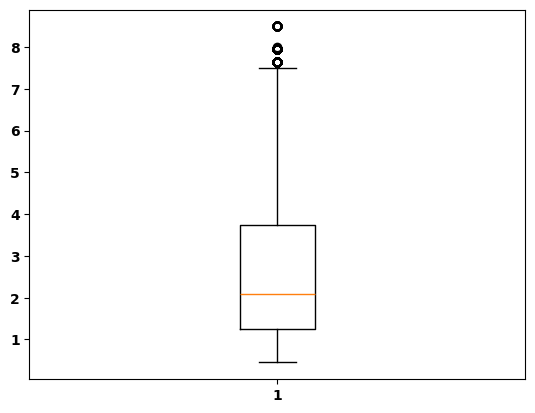

In [19]:
# Checking for outliers in price column
plt.boxplot(retail['Price'])


plt.show()



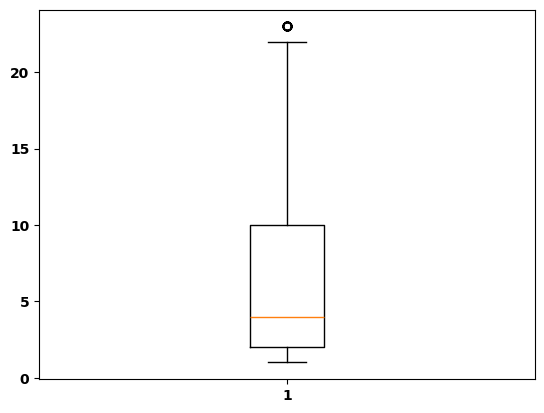

In [20]:
plt.boxplot(retail['Quantity'])

plt.show()


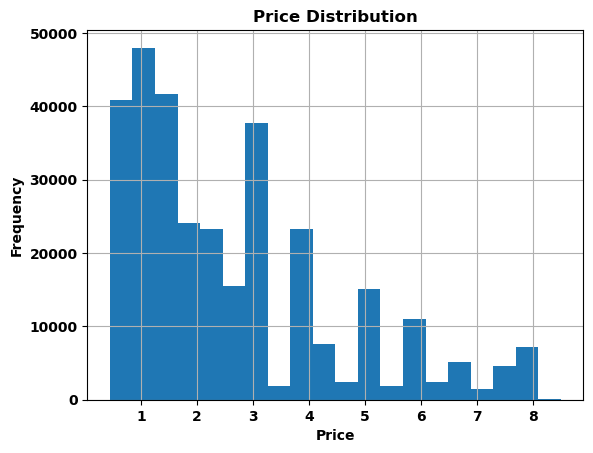

In [21]:
# Checking price's distribution through a histogram
retail['Price'].hist(bins=20)

# Labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

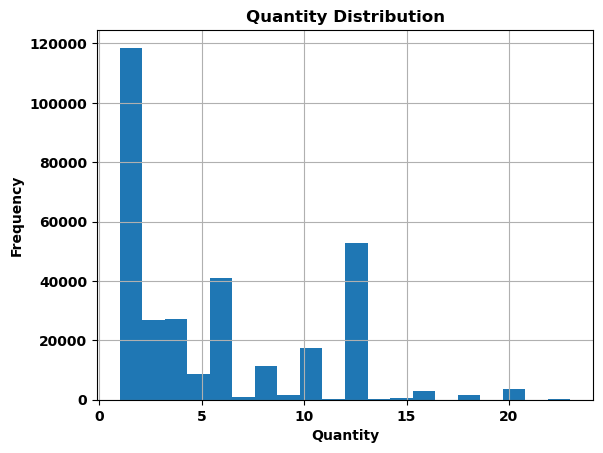

In [22]:
# Checking price's distribution through a histogram
retail['Quantity'].hist(bins=20)

# Labels
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

In [23]:
print(retail.shape)

(315508, 8)


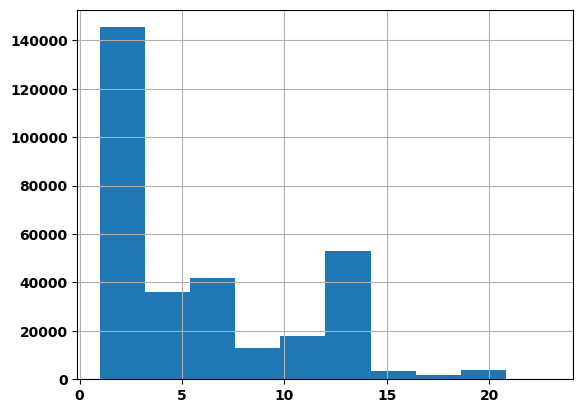

In [24]:
# Checking price's distribution through a histogram
retail['Quantity'].hist()

# Labels


plt.show()

## Since retail dataset is massive, I will do random samples. I will select all the transactions from random days until I get around 15000 rows dataset.

In [46]:
import pandas as pd
import numpy as np

# Convert 'InvoiceDate' to only days, getting rid of the time
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate']).dt.date

# Calculate the number of transaction/day
transaction_days = retail.groupby('InvoiceDate').size()

# Shuffle the days
shuffled_days = transaction_days.sample(frac=1, random_state=1)

# Accumulate the transactions
cumulative_transaction = shuffled_days.cumsum()

# Find the days needed to reach the number of rows wished
target_transaction = 10000
selected_days = cumulative_transaction[cumulative_transaction <= target_transaction]
if selected_days.sum() < target_transaction:
    # If the sum is less than the target, add one more day
    next_day = shuffled_days.loc[cumulative_transaction > target_transaction].index[0]
    selected_days = selected_days.append(shuffled_days.loc[next_day])

# Now, get the actual transaction lines from the selected days
retail_sample1 = retail[retail['InvoiceDate'].isin(selected_days.index)]
print(retail_sample1)

       Invoice StockCode                         Description  Quantity  \
91525   498027     21429      RED GINGHAM ROSE JEWELLERY BOX         8   
91526   498027     10125             MINI FUNKY DESIGN TAPES        20   
91527   498027     20685                   DOOR MAT RED SPOT         4   
91528   498027     21524     DOOR MAT SPOTTY HOME SWEET HOME         2   
91529   498027     48184              DOOR MAT ENGLISH ROSE          4   
...        ...       ...                                 ...       ...   
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931              JUMBO STORAGE BAG SUKI         2   

       InvoiceDate  Price  Customer ID         Country  
91525   2010-02-16   1.65      17644.0  United Kingdom

In [45]:
print(sampled_df['Country'].value_counts())

United Kingdom          8575
France                   286
EIRE                     198
Germany                  122
Portugal                  87
Lithuania                 65
United Arab Emirates      51
Spain                     36
Finland                   31
Belgium                   19
Unspecified               15
Channel Islands           12
Denmark                   11
Sweden                     6
Netherlands                2
Japan                      2
Name: Country, dtype: int64


# Questions/considerations:

* Customers that repeatidly purchased across the time.
* Items bought in the same basket
* 


### Resources:

https://pbpython.com/market-basket-analysis.html

https://medium.com/@rifatalkausar/market-basket-analysis-using-mlxtend-library-in-python-7e56bd41a569

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://www.w3resource.com/pandas/series/series-cumsum.php
